<a href="https://colab.research.google.com/github/Viktory4121/MM/blob/main/%D0%98%D0%94%D0%973.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###ИДЗ 3. Нечёткие модели.
####Вариант 11.

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib.animation import FuncAnimation
import pylab
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

**Задание функции**

In [8]:
#Вид функции: f(t) = (t**3) - 37 * (t**2) + 447 * t - 1755 = (t - 9) * (t - 13) * (t - 15)
def f(t):
  return ((t - 9) * (t - 13) * (t - 15))
#Производная функции f(t)
def df(t):
  return (3 * (t**2) - 74 * t + 447)

Вид функции f(t)



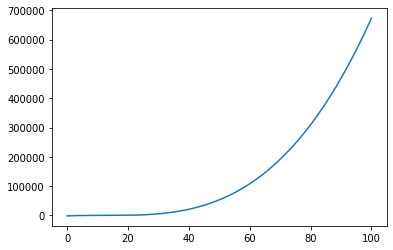

In [15]:
t = np.linspace(0, 100, num = 200)
f_t = f(t)
print('Вид функции f(t)\n')
plt.plot(t, f_t)

**Нахождение уравнений касательных**

In [33]:
#Для примера возьмём из нашей выборки точку под номером 47 и 122
def finding_tangent_equation(num, t0):
  print('Формула касательной имеет вид: y = a * t + b, где')
  print("a = f'(t0)\nb = f(t0) - t0 * f'(t0)")
  a = df(t0)
  b = f(t0) - t0 * df(t0)
  print('При:')
  print("t0 = " + str(round(t0, 4)))
  print('f(t0) = ' + str(round(f(t0), 4)))
  print("f'(t0) = " + str(round(df(t0), 4)))
  print(str(num) + '-е уравнение касательной имеет вид: y = ' + str(round(a, 4)) + ' * t + (' + str(round(b, 4)) + ')\n')
  return a, b

a1, b1 = finding_tangent_equation(1, t[47 - 1])
a2, b2 = finding_tangent_equation(2, t[122 - 1])

Формула касательной имеет вид: y = a * t + b, где
a = f'(t0)
b = f(t0) - t0 * f'(t0)
При:
t0 = 23.1156
f(t0) = 1158.8009
f'(t0) = 339.4371
1-е уравнение касательной имеет вид: y = 339.4371 * t + (-6687.4829)

Формула касательной имеет вид: y = a * t + b, где
a = f'(t0)
b = f(t0) - t0 * f'(t0)
При:
t0 = 60.804
f(t0) = 113430.9267
f'(t0) = 7038.8891
2-е уравнение касательной имеет вид: y = 7038.8891 * t + (-314561.8272)



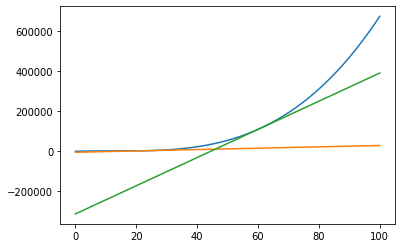

In [34]:
#Функция касательных:
def tangent(a, b, t):
  return (a * t + b)

y1 = tangent(a1, b1, t)
y2 = tangent(a2, b2, t)

plt.plot(t, f_t)
plt.plot(t, y1)
plt.plot(t, y2)

**Построение mu1 и mu2 (касательные по концам промежутков t и f(t)**

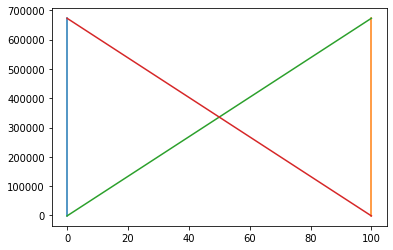

In [59]:
#строится по концам интервалов t=[t1,tn] и f(t)=[f(t1),f(tn)]
plt.plot([t[0], t[0]], [f_t[0], f_t[len(f_t) - 1]])
plt.plot([t[len(t) - 1], t[len(t) - 1]], [f_t[0], f_t[len(f_t) - 1]])
#касательные:
plt.plot([t[0], t[len(t) - 1]], [f_t[0], f_t[len(f_t) - 1]])
plt.plot([t[0], t[len(t) - 1]], [f_t[len(f_t) - 1], f_t[0]])

**Найдём значения mu1 и mu2**

In [63]:
mu1_a, mu1_b = finding_tangent_equation(1, t[0])
mu2_a, mu2_b = finding_tangent_equation(2, t[len(t) - 1])

Формула касательной имеет вид: y = a * t + b, где
a = f'(t0)
b = f(t0) - t0 * f'(t0)
При:
t0 = 0.0
f(t0) = -1755.0
f'(t0) = 447.0
1-е уравнение касательной имеет вид: y = 447.0 * t + (-1755.0)

Формула касательной имеет вид: y = a * t + b, где
a = f'(t0)
b = f(t0) - t0 * f'(t0)
При:
t0 = 100.0
f(t0) = 672945.0
f'(t0) = 23047.0
2-е уравнение касательной имеет вид: y = 23047.0 * t + (-1631755.0)



In [66]:
mu1 = tangent(mu1_a, mu1_b, t)
mu2 = tangent(mu2_a, mu2_b, t)

**Построим нечёткую модель y_ и изобразим эти значения вместе с функцией f(t) и двумя касательными**

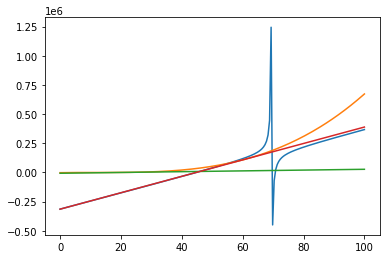

In [70]:
def y_new(t, y1, y2, a1, a2, b1, b2, mu1, mu2):
  return ((mu1 * (a1 * t + b1) + mu2 * (a2 * t + b2)) / (mu1 + mu2))

y_ = y_new(t, y1, y2, a1, a2, b1, b2, mu1, mu2)
plt.plot(t, y_)
plt.plot(t, f_t)
plt.plot(t, y1)
plt.plot(t, y2)

**Общая таблица**

In [74]:
data = list(zip(t, f_t, df_t, mu1, mu2, y1, y2, y_))
print(pd.DataFrame(data, columns=["t", "f(t)", "f'(t)", "mu1", "mu2", "y_кас1", "y_кас2", 'y_model']))

              t           f(t)         f'(t)           mu1           mu2        y_кас1         y_кас2       y_model
0      0.000000   -1755.000000    447.000000  -1755.000000 -1.631755e+06  -6687.482924 -314561.827248 -3.142311e+05
1      0.502513   -1539.593189    410.571627  -1530.376884 -1.620174e+06  -6516.911537 -311024.697050 -3.107373e+05
2      1.005025   -1342.111411    375.658367  -1305.753769 -1.608592e+06  -6346.340151 -307487.566852 -3.072433e+05
3      1.507538   -1161.793303    342.260221  -1081.130653 -1.597011e+06  -6175.768764 -303950.436654 -3.037490e+05
4      2.010050    -997.877502    310.377187   -856.507538 -1.585429e+06  -6005.197377 -300413.306456 -3.002543e+05
5      2.512563    -849.602644    280.009267   -631.884422 -1.573848e+06  -5834.625990 -296876.176258 -2.967594e+05
6      3.015075    -716.207365    251.156461   -407.261307 -1.562267e+06  -5664.054604 -293339.046060 -2.932641e+05
7      3.517588    -596.930303    223.818767   -182.638191 -1.550685e+06